<a href="https://colab.research.google.com/github/yongug/Fly_python/blob/main/hw2_wordcloud_flyai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Using cached BeautifulSoup-3.2.2.tar.gz (32 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,773 kB/s)
debconf: u

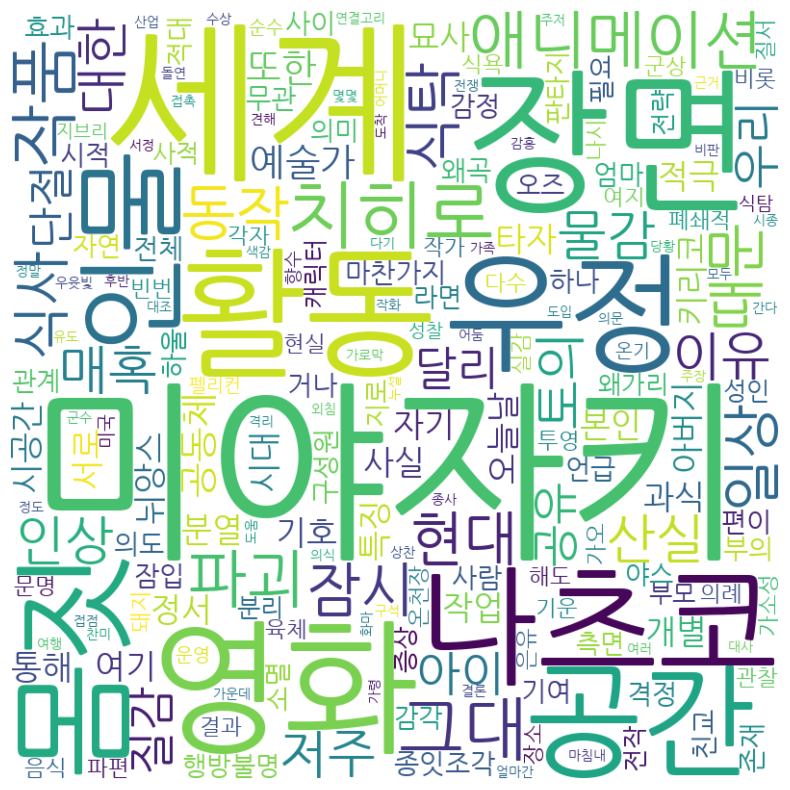

In [2]:
!pip install requests
!pip install BeautifulSoup
!pip install konlpy
!pip install wordcloud
!pip install matplotlib


import requests
from bs4 import BeautifulSoup as bs
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from konlpy.tag import Okt

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt-get update -qq
!apt-get install fonts-nanum* -qq

plt.rc('font', family='NanumBarunGothic')


# 1. 크롤링
res = requests.get('http://m.cine21.com/news/view/?mag_id=103862')
soup = bs(res.content, 'html.parser')
result = soup.select_one('#news_content')

# 2. 텍스트 추출 및 전처리
text = result.get_text()

# 한글 형태소 분석기 Okt 사용
okt = Okt()
nouns = okt.nouns(text)

# 단어 길이가 1인 것들은 제외
words = [word for word in nouns if len(word) > 1]

# 단어 빈도 계산
from collections import Counter
word_counts = Counter(words)

# 3. 워드 클라우드 생성
wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # 한글 폰트 경로
    width=800,
    height=800,
    background_color='white'
).generate_from_frequencies(word_counts)

# 4. 워드 클라우드 시각화
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
